In [1]:
import pandas as pd
import seaborn as sns

In [28]:
hormones = ['ABA', 'ACC', 'Cytokinin', 'GA', 'IAA']
dfs = []
for hormone in hormones:
    pareto_df = pd.read_csv(hormone + '-pareto.csv')
    na_df = pd.read_csv(hormone + '-na.csv')
    df = pd.merge(pareto_df, na_df)
    dfs.append(df)

full_df = pd.concat(dfs)
full_df = full_df[['Accession', 'Condition', 'Day', 'Distance.squared', 'Alpha', 'Na/K.ratio']]
full_df = full_df.groupby(['Accession', 'Condition', 'Day']).agg('mean').reset_index()
print(full_df)

   Accession Condition   Day  Distance.squared     Alpha  Na/K.ratio
0     la1511   S+10aba     9          0.004770  0.408333    5.205278
1     la1511    S+1aba     9          0.343746  0.489000    2.849208
2     la1511    S+1acc  day5          0.001987  0.990000    1.706913
3     la1511    S+1acc  day9          0.052877  0.701667    1.706913
4     la1511     S+1ga     9          1.396814  0.430909    1.015392
5     la1511    S+5acc  day5          0.000000  0.690000    2.739444
6     la1511    S+5acc  day9          1.296420  0.618333    2.739444
7     la1511     S+5ga     5          1.254235  0.583333    0.904131
8     la1511     S+5ga     9         16.456837  0.540000    0.904131
9     la1511  S+hicyto     5          0.000017  0.820000    2.640877
10    la1511  S+hicyto     9          0.013516  0.768889    2.640877
11    la1511     S+iaa     5          5.432952  0.623000    1.426322
12    la1511     S+iaa     9          3.111631  0.732222    1.426322
13    la1511  S+locyto     9      

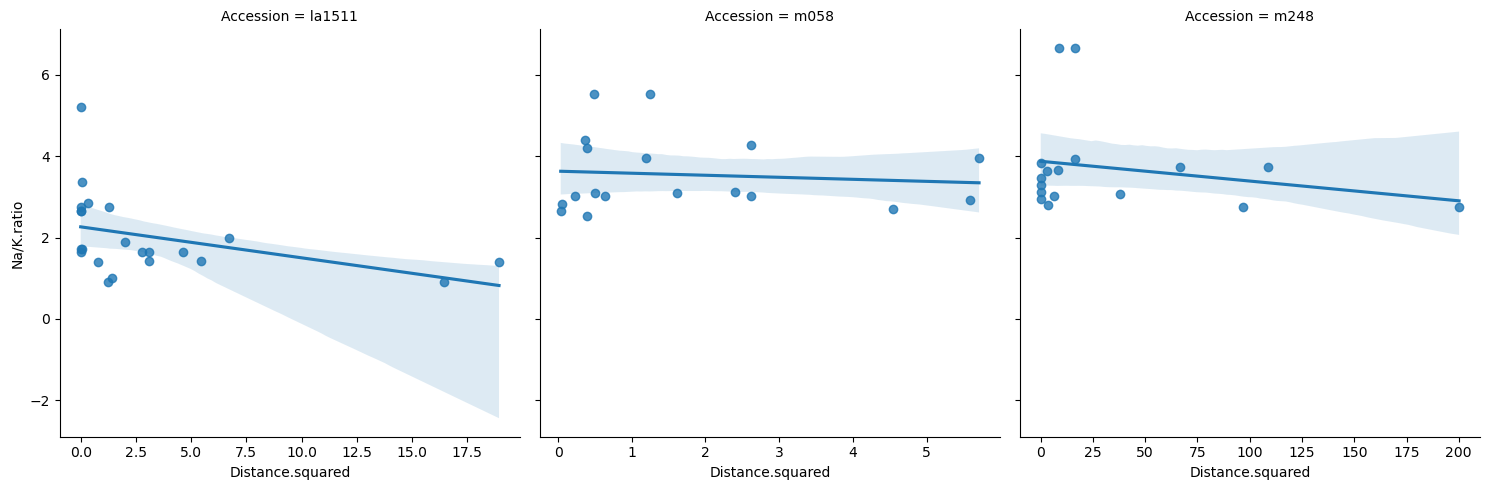

In [40]:
sns.lmplot(x='Distance.squared', 
           y='Na/K.ratio', 
           col='Accession', 
           data=full_df, 
           facet_kws={'sharex' : False})